#This code is a comprehensive example of predicting house prices in the United States using machine learning techniques. The dataset used is complex, featuring multiple null values, mismatched columns, and extraneous information. The objective is to demonstrate a systematic approach to preprocessing, cleaning, and modeling, showcasing the steps involved in transforming raw data into a format suitable for predictive modeling.
The code serves as an instructive example of transforming a complex dataset into a predictive model. It showcases the importance of data preprocessing, feature engineering, and the application of advanced machine learning algorithms for accurate predictions

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("C:\\Users\\TEMP\\Downloads\\House_price_multifeatures.csv", low_memory=False)


In [4]:
data.columns

Index(['Id', 'PropertyLocationStreet1', 'PropertyLocationStreet2',
       'PropertyCity', 'CountyFIPS', 'PropertyZip', 'OwnerName',
       'OwnerMailAddress1', 'OwnerMailAddress2', 'OwnerCity', 'OwnerState',
       'OwnerZip', 'CitizensTerritory', 'ConstructionType', 'NumberOfStories',
       'NumberOfFamilies', 'YearBuilt', 'YearofRoof', 'YearofRoofVerified',
       'RoofMaterial', 'AdjSquareFeet', 'Occupancy',
       'NumberOfMonthsUnoccupied', 'PPC', 'BCEG', 'TypeOfResidence',
       'FloorOfResidence', 'FloridaWindpool', 'DistancetoCoast',
       'DistancetoSinkhole', 'DistancetoHydrant', 'DistancetoFireDepartment',
       'FireDistrict', 'RespondingFireDepartment', 'CentralStationAlarm',
       'AutomaticSprinklers', 'NumberOfClaims', 'LocationWindSpeed',
       'DesignWindSpeed', 'InternalPressureDesign', 'WindborneDebrisRegion',
       'Terrain', 'RoofDeckAttachment', 'RoofCover', 'RooftoWallconnection',
       'SecondaryWaterResistance', 'OpeningProtection', 'RoofShape',
      

In [5]:
df_years = data.groupby(['AssesmentYear'],as_index=False).aggregate({'ValueofHome':'mean'})

In [6]:
def get_area(x):
    if x<=1000:
        return '0-1000'
    if x<=1500:
        return '1000-1500'
    if x<=2000:
        return '1500-2000'
    if x<3000:
        return '2000-3000'
    else:
        return '>3000'
data['a2']=data['AdjSquareFeet'].apply(get_area)

In [7]:
# plt.bar(df_years['a2'])

In [8]:
pip install matplotlib


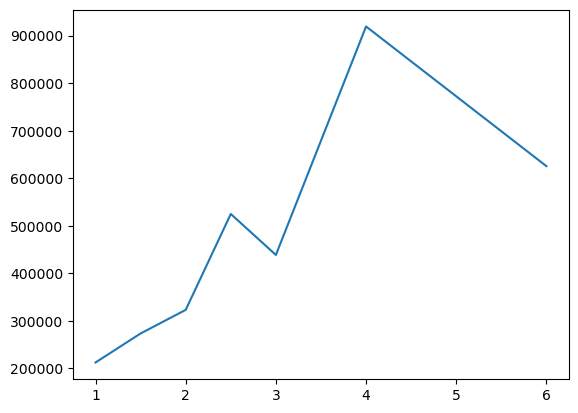

In [9]:
import matplotlib.pyplot as plt

col = 'NumberOfStories'
df_years = data.groupby([col], as_index=False).aggregate({'ValueofHome': 'mean'})
plt.plot(df_years[col], df_years['ValueofHome'])
plt.show()  # This command displays the plot


In [10]:
# plt.plot()

In [11]:
data

Id  PropertyLocationStreet1 PropertyLocationStreet2  \
0      120210f35317ca697      503 LAKE LOUISE CIR                  19-201   
1      12086db272d757be6             5934 NW 7 PL                     NaN   
2      12057c35a22b0865c       5713 PALM RIVER RD                     NaN   
3      12057cf31f8e69893  1805 MAGDALENE MANOR DR                     NaN   
4      12057c5b7712cfb0b     7405 ALAFIA RIDGE LP                     NaN   
...                  ...                      ...                     ...   
81742  1200980de660f371c          1199 HOUSTON ST                     NaN   
81743  1200980de660f371c          1199 HOUSTON ST                     NaN   
81744  1208698914968668a          3715 HARLANO ST                     NaN   
81745  120117d9876b67325             714 N 32 AVE                     NaN   
81746  1208671d49043ce45            6520 SW 42 ST                     NaN   

       PropertyCity  CountyFIPS  PropertyZip                  OwnerName  \
0            NAPLES        21.0        34110  BOLTZ, LARRY P & SANDRA A   
1             MIAMI        86.0        33127         LILIANE MORISSETTE   
2             TAMPA        57.0        33619              PADRON LUIS A   
3             TAMPA        57.0        33613            BELLO CELESTE M   
4         RIVERVIEW        57.0        33569                LANE ROY JR   
...             ...         ...          ...                        ...   
81742     MELBOURNE         9.0        32935             HELLER, ARDYTH   
81743     MELBOURNE         9.0        32935             HELLER, ARDYTH   
81744  CORAL GABLES        86.0        33134            MARITZA NAVARRO   
81745     HOLLYWOOD        11.0        33021         CONNOLLY,MEAGHAN N   
81746         MIAMI        86.0        33155          MARTHA M MARCALLE   

             OwnerMailAddress1 OwnerMailAddress2     OwnerCity OwnerState  \
0         3739 WRENS NEST BLVD               NaN        MAUMEE         OH   
1                 5934 NW 7 PL               NaN         MIAMI         FL   
2           5713 PALM RIVER RD               NaN         TAMPA         FL   
3      1805 MAGDALENE MANOR DR               NaN         TAMPA         FL   
4       7405 ALAFIA RIDGE LOOP               NaN     RIVERVIEW         FL   
...                        ...               ...           ...        ...   
81742          1199 HOUSTON ST               NaN     MELBOURNE         FL   
81743          1199 HOUSTON ST               NaN     MELBOURNE         FL   
81744          3715 HARLANO ST               NaN  CORAL GABLES         FL   
81745             714 N 32 AVE               NaN     HOLLYWOOD    FLORIDA   
81746            6520 SW 42 ST               NaN         MIAMI         FL   

      OwnerZip  CitizensTerritory ConstructionType  NumberOfStories  \
0        43537              541.0              NaN              NaN   
1        33127               32.0              NaN              NaN   
2        33619               80.0          MASONRY              NaN   
3        33613               80.0          MASONRY              NaN   
4        33569               80.0          MASONRY              NaN   
...        ...                ...              ...              ...   
81742    32935               64.0          MASONRY              1.0   
81743    32935               64.0          MASONRY              1.0   
81744      NaN               34.0              NaN              NaN   
81745    33021               35.0          MASONRY              1.0   
81746    33155               34.0              NaN              NaN   

       NumberOfFamilies  YearBuilt  YearofRoof YearofRoofVerified  \
0                   NaN     1988.0         NaN              False   
1                   NaN     2004.0         NaN              False   
2                   NaN     2005.0         NaN              False   
3                   NaN     1984.0         NaN              False   
4                   NaN     1986.0         NaN              False   
... 

In [12]:
print(len(data))
col_for_drop = []
for col in data.columns:
    if (sum(data[col].isnull())/len(data))>=0.3:
        col_for_drop.append(col)

81747


In [13]:
len(col_for_drop)

46

In [14]:
data2=data.drop(columns=col_for_drop)

In [15]:
# col2=[]
# for i in col_for_drop:
#     unique_v=data[i].nunique()
#     print('#'*30,i,unique_v)
    
#     if unique_v>20 or unique_v==0:
#         col2.append(i)

In [16]:
# data2 = data.drop(columns = col2)

In [17]:
data2.head(2)

Id PropertyLocationStreet1 PropertyCity  CountyFIPS  \
0  120210f35317ca697     503 LAKE LOUISE CIR       NAPLES        21.0   
1  12086db272d757be6            5934 NW 7 PL        MIAMI        86.0   

   PropertyZip                  OwnerName     OwnerMailAddress1 OwnerCity  \
0        34110  BOLTZ, LARRY P & SANDRA A  3739 WRENS NEST BLVD    MAUMEE   
1        33127         LILIANE MORISSETTE          5934 NW 7 PL     MIAMI   

  OwnerState OwnerZip  CitizensTerritory ConstructionType  YearBuilt  \
0         OH    43537              541.0              NaN     1988.0   
1         FL    33127               32.0              NaN     2004.0   

  YearofRoofVerified  AdjSquareFeet  PPC TypeOfResidence  DistancetoCoast  \
0              False         1384.0  NaN   CONDO STACKED           2956.8   
1              False         1534.0    1   SINGLE FAMILY            -99.0   

   DistancetoSinkhole  DistancetoFireDepartment  \
0                 NaN                      1.20   
1                9.56                      0.98   

                            RespondingFireDepartment  LocationWindSpeed  \
0  NORTH NAPLES FIRE DEPARTMENT AND RESCUE STATIO...              129.0   
1         MIAMI FIRE DEPARTMENT AND RESCUE STATION 9              146.0   

  WindborneDebrisRegion Terrain  ValueofHome FloodZone  ParcelSize  \
0                  True    B        200840.0     A:100         NaN   
1                  True    HVHZ     164994.0     A:100      4880.0   

  ImprovementQuality  ImprovementQualityDate  NumberOfBuildings  \
0      ABOVE AVERAGE                   118.0                NaN   
1      ABOVE AVERAGE                   212.0                1.0   

   NumberOfUnits  CountyName PropertyState  CentroidLatitude  \
0            1.0     COLLIER            FL          26.30478   
1            1.0  MIAMI-DADE            FL          25.82994   

   CentroidLongitude  CoastLatitude  CoastLongitude  FireStationLatitude  \
0          -81.81791            NaN             NaN              26.3221   
1          -80.21004       25.83218       -80.18086              25.8330   

   FireStationLongitude  SinkholeLatitude  SinkholeLongitude  SinkholeId  \
0             -81.81959               NaN                NaN         NaN   
1             -80.19468          25.96256          -80.16641      2783.0   

  SinkholeAddress  EffectiveYearBuilt Homestead FloodzoneLastUpdatedDate  \
0             NaN              1988.0     False           5/12/2017 0:00   
1             NaN              2004.0      True           12/8/2017 0:00   

        StateParcelId  AssesmentYear TTTerritory         a2  
0  C21-000-188-9852-8         2015.0       541-0  1000-1500  
1  C23-000-198-3578-4         2015.0       032-0  1500-2000

In [18]:
data2['PropertyLocationStreet1'].nunique()

58766

In [19]:
data2.drop(columns=['PropertyLocationStreet1','PropertyCity','CountyFIPS','OwnerName','OwnerMailAddress1',
                   'OwnerCity'],inplace=True)

In [20]:
# Check column names
print(data2.columns)

# Inspect the DataFrame
print(data2.head())



Index(['Id', 'PropertyZip', 'OwnerState', 'OwnerZip', 'CitizensTerritory',
       'ConstructionType', 'YearBuilt', 'YearofRoofVerified', 'AdjSquareFeet',
       'PPC', 'TypeOfResidence', 'DistancetoCoast', 'DistancetoSinkhole',
       'DistancetoFireDepartment', 'RespondingFireDepartment',
       'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'ValueofHome',
       'FloodZone', 'ParcelSize', 'ImprovementQuality',
       'ImprovementQualityDate', 'NumberOfBuildings', 'NumberOfUnits',
       'CountyName', 'PropertyState', 'CentroidLatitude', 'CentroidLongitude',
       'CoastLatitude', 'CoastLongitude', 'FireStationLatitude',
       'FireStationLongitude', 'SinkholeLatitude', 'SinkholeLongitude',
       'SinkholeId', 'SinkholeAddress', 'EffectiveYearBuilt', 'Homestead',
       'FloodzoneLastUpdatedDate', 'StateParcelId', 'AssesmentYear',
       'TTTerritory', 'a2'],
      dtype='object')
                  Id  PropertyZip OwnerState OwnerZip  CitizensTerritory  \
0  120210f35317c

In [21]:
data2.drop(columns=[ 'Id'], inplace=True)


In [22]:
# data2['NumberOfStories'] = data2['NumberOfStories'].fillna(0)

In [23]:
data2['PPC'] = data2['PPC'].fillna('Not definded')

In [24]:
# data2['BCEG'] = data2['BCEG'].fillna('Not definded')

In [25]:
# data2['RoofShape'] = data2['RoofShape'].fillna('Not definded')

In [26]:
data2['YearBuilt'] = data2['YearBuilt'].fillna(0)

In [27]:
# data2.drop(columns=['NumberOfFamilies'],inplace=True)

In [28]:
# Dropna YearBuilt,AdjSquareFeet

In [29]:
data3=data2.dropna()

In [30]:
data3.drop(columns=['OwnerState','OwnerZip','CitizensTerritory','RespondingFireDepartment',
                   'PropertyState','CentroidLatitude','CentroidLongitude','CoastLatitude',
                    'FireStationLatitude','FireStationLongitude','SinkholeLatitude','SinkholeLongitude',
                   'SinkholeAddress','StateParcelId'],inplace=True)

C:\Users\TEMP\AppData\Local\Temp\ipykernel_64252\661548550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop(columns=['OwnerState','OwnerZip','CitizensTerritory','RespondingFireDepartment',


In [31]:
data3['PropertyZip'] = data3['PropertyZip'].astype(str)

C:\Users\TEMP\AppData\Local\Temp\ipykernel_64252\1066385196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['PropertyZip'] = data3['PropertyZip'].astype(str)


In [32]:
data3.columns

Index(['PropertyZip', 'ConstructionType', 'YearBuilt', 'YearofRoofVerified',
       'AdjSquareFeet', 'PPC', 'TypeOfResidence', 'DistancetoCoast',
       'DistancetoSinkhole', 'DistancetoFireDepartment', 'LocationWindSpeed',
       'WindborneDebrisRegion', 'Terrain', 'ValueofHome', 'FloodZone',
       'ParcelSize', 'ImprovementQuality', 'ImprovementQualityDate',
       'NumberOfBuildings', 'NumberOfUnits', 'CountyName', 'CoastLongitude',
       'SinkholeId', 'EffectiveYearBuilt', 'Homestead',
       'FloodzoneLastUpdatedDate', 'AssesmentYear', 'TTTerritory', 'a2'],
      dtype='object')

In [33]:
data4 = pd.get_dummies(data3)

In [34]:
data4.head(2)

YearBuilt  AdjSquareFeet  DistancetoCoast  DistancetoSinkhole  \
2     2005.0         2612.0            -99.0                0.82   
3     1984.0         2848.0            -99.0                0.39   

   DistancetoFireDepartment  LocationWindSpeed  ValueofHome  ParcelSize  \
2                      0.05              120.0     200346.0     16913.0   
3                      1.69              120.0     364161.0     27374.0   

   ImprovementQualityDate  NumberOfBuildings  NumberOfUnits  CoastLongitude  \
2                   117.0                1.0            1.0       -82.41343   
3                   218.0                1.0            1.0       -82.55392   

   SinkholeId  EffectiveYearBuilt  AssesmentYear  PropertyZip_32003  \
2       468.0              2010.0         2015.0                  0   
3       323.0              2006.0         2015.0                  0   

   PropertyZip_32011  PropertyZip_32034  PropertyZip_32038  PropertyZip_32040  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32043  PropertyZip_32063  PropertyZip_32065  PropertyZip_32068  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32073  PropertyZip_32080  PropertyZip_32082  PropertyZip_32086  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32087  PropertyZip_32091  PropertyZip_32092  PropertyZip_32097  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32102  PropertyZip_32118  PropertyZip_32119  PropertyZip_32127  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32128  PropertyZip_32129  PropertyZip_32132  PropertyZip_32136  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32137  PropertyZip_32141  PropertyZip_32159  PropertyZip_32162  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32164  PropertyZip_32168  PropertyZip_32169  PropertyZip_32174  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32180  PropertyZip_32202  PropertyZip_32205  PropertyZip_32206  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32207  PropertyZip_32208  PropertyZip_32209  PropertyZip_32210  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32211  PropertyZip_32216  PropertyZip_32217  PropertyZip_32219  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32220  PropertyZip_32221  PropertyZip_32222  PropertyZip_32223  \
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   

   PropertyZip_32224  PropertyZip_32225  PropertyZip_32226  PropertyZip_32233  \
2                  0                  0                  0                  0   
3                  0          

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x=data4.drop(columns=['ValueofHome'])
y=data4['ValueofHome']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100)

In [39]:
import numpy as np
y_train  = np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35078, 1022)
(35078, 1)
(11693, 1022)
(11693, 1)


In [41]:
sc=StandardScaler()
sc_y=StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)
y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.transform(y_test)

In [42]:
y_train_scaled

array([[ 0.67891137],
       [-0.50580284],
       [-0.32091989],
       ...,
       [ 0.29864828],
       [ 0.16485763],
       [-0.51869413]])

In [43]:
x_train_scaled.shape,x_test_scaled.shape,y_train.shape,y_test.shape

((35078, 1022), (11693, 1022), (35078, 1), (11693, 1))

In [44]:

from sklearn.metrics import r2_score

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
model=DecisionTreeRegressor()

In [47]:
model.fit(x_train_scaled,y_train_scaled)

DecisionTreeRegressor()

In [48]:
y_pred_scaled = model.predict(x_test_scaled)

In [49]:
r2_score(y_pred_scaled,y_test_scaled)

0.6282772260988068

In [50]:
!pip install xgboost

In [51]:
import xgboost as xgb

In [52]:
dtrain = xgb.DMatrix(x_train_scaled, label=y_train_scaled)
dtest = xgb.DMatrix(x_test_scaled, label=y_test_scaled)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Use regression objective
    'max_depth': 10,                    # Maximum depth of a tree
    'learning_rate': 0.1,              # Learning rate
    'subsample': 0.8,                  # Fraction of samples used for training
    'colsample_bytree': 0.8,           # Fraction of features used for training each tree
    'eval_metric': 'rmse'              # Evaluation metric: Root Mean Squared Error
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model

In [53]:
rmse = r2_score(y_test_scaled, y_pred)
print(f'R2 Value: {rmse}')

R2 Value: 0.8326813125399474


In [54]:
import matplotlib.pyplot as plt

In [55]:
print (y_pred)

[ 0.06297161 -0.2981733   0.88143146 ... -0.55774325  0.24302596
 -0.22683437]


In [56]:
y_pred2=np.array(y_pred).reshape(-1,1)

In [57]:
y_pred_true=sc_y.inverse_transform(y_pred2)
y_test_true=sc_y.inverse_transform(y_test_scaled)

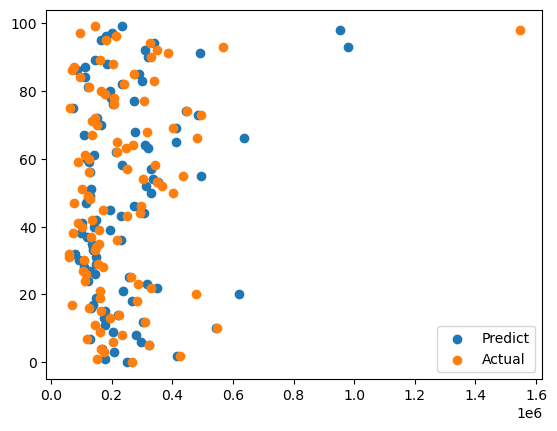

In [58]:
plt.scatter(y_pred_true[:100],range(100),label='Predict')
plt.scatter(y_test_true[:100],range(100),label='Actual')
plt.legend()

##This code is for predicting house prices in the US using a machine learning model, specifically XGBoost. Let's break down the key steps in the code:

1. **Data Loading and Preprocessing:**
   - The code starts by loading a dataset from a CSV file using pandas. It then performs various preprocessing steps, including grouping by the assessment year, creating a new area column based on the square footage, and visualizing the average home value based on the number of stories.

2. **Data Cleaning:**
   - The code identifies and drops columns with a significant number of missing values. It also drops some specific columns that may not be relevant for the predictive model.

3. **One-Hot Encoding:**
   - Categorical columns in the dataset are one-hot encoded to convert them into a format suitable for machine learning models.

4. **Feature Scaling:**
   - Standard scaling is applied to the feature variables and the target variable using `StandardScaler` from scikit-learn. This step is crucial for certain machine learning algorithms.

5. **Decision Tree Regression:**
   - The code uses a Decision Tree Regressor from scikit-learn to create a baseline model for house price prediction.

6. **XGBoost Model:**
   - The code then employs the XGBoost algorithm for regression. It sets parameters, trains the model on the training set, and evaluates it on the test set.

7. **Evaluation:**
   - The code calculates the R-squared value to evaluate the performance of the XGBoost model.

8. **Visualization:**
   - Finally, the code uses matplotlib to visualize the predicted and actual house prices for the first 100 samples in the test set.

9. **Note:**
   - The code uses `r2_score` from scikit-learn to evaluate the models. Also, it utilizes `xgb.DMatrix` for the XGBoost model.


In [62]:
##S&P index
#https://fred.stlouisfed.org/series/CSUSHPINSA